<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Research Project with Income, Taxes, and Life Expectancy Data

Author: Sammuel Cho

---


### 1. Upload files needed for working with incomes, taxes, and life expectancy data.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline


UsageError: Line magic function `%` not found.


In [44]:
#Need to import to use Excel xlsx files
import xlsxwriter
import xlrd
import openpyxl

### 2. Conduct exploratory data analysis on the data sets. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** There are lies, damned lies, and statistics.

In [ ]:
# A:

households_fed_tax_rates = pd.read_csv ('CBO_distribution_household_income_2017_data\households_ranked_by_market_inc_table_09_federal_tax_rates_1979_2017.csv')
print(households_fed_tax_rates)

In [77]:
households_fed_tax_rates.head()

,household_type,income_group,year,federal_tax,individual_income_tax,payroll_tax,corporate_income_tax,excise_tax
0,all_households,all_quintiles,1979,22.4,11.1,6.9,3.4,1.0
1,all_households,all_quintiles,1980,22.4,11.8,7.0,2.8,0.8
2,all_households,all_quintiles,1981,22.6,12.1,7.5,2.2,0.8
3,all_households,all_quintiles,1982,20.8,11.1,7.6,1.4,0.8
4,all_households,all_quintiles,1983,20.5,10.3,7.5,1.8,0.9


### 3. Looking into a data set from CBO (Households Income Groups and Tax Rates by Year).

**Look at data types and see relationships.**

In [78]:
households_fed_tax_rates.dtypes

household_type            object
income_group              object
year                       int64
federal_tax              float64
individual_income_tax    float64
payroll_tax              float64
corporate_income_tax     float64
excise_tax               float64
dtype: object

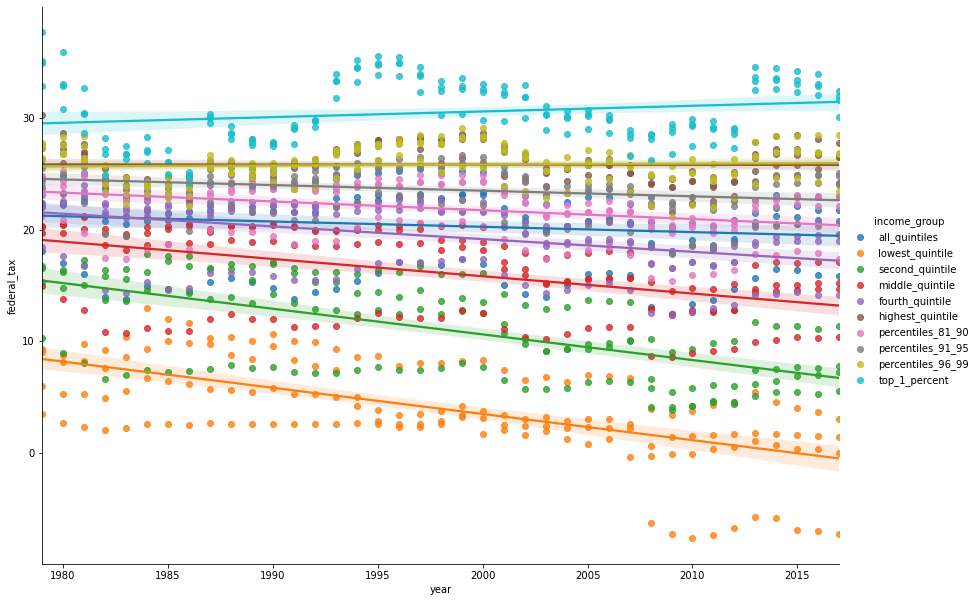

In [96]:
sns.lmplot(data=households_fed_tax_rates, x="year", y="federal_tax", hue="income_group", height=8.27, aspect=11.7/8.27)
#There is a general decline in federal tax rates

### 4. Look at Median Wages for Households? Why?
**Inflation is relatively low and so are the increases in median wages.**

> **Note:** Used CBO and US Treasury data median wages as US income distribution is skewed and so average wages data is not as useful.

In [29]:
median_household_incomes = pd.read_csv ('CBO_distribution_household_income_2017_data\households_ranked_by_market_inc_table_04_median_household_income_1979_2017.csv')
median_household_incomes.sort_values(by="year", inplace=True)
median_household_incomes.head()

        

,year,market_inc,adj_market_inc,inc_before_transfers_taxes,adj_inc_before_transfers_taxes,inc_after_transfers_taxes,adj_inc_after_transfers_taxes
0,1979,60900,33000,63700,34900,52300,28500
1,1980,58100,31800,61600,33900,50900,27700
2,1981,58000,31800,61500,34100,50400,27600
3,1982,56300,31000,60500,33700,50300,27700
4,1983,55500,30600,59900,33500,49900,27800


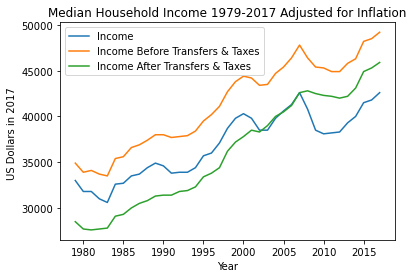

In [35]:
plt.plot(median_household_incomes["year"], median_household_incomes["adj_market_inc"], label="Income")
plt.plot(median_household_incomes["year"], median_household_incomes["adj_inc_before_transfers_taxes"], label="Income Before Transfers & Taxes")
plt.plot(median_household_incomes["year"], median_household_incomes["adj_inc_after_transfers_taxes"], label="Income After Transfers & Taxes")
plt.xlabel("Year")
plt.ylabel("US Dollars in 2017 ")
plt.title("Median Household Income 1979-2017 Adjusted for Inflation")
plt.legend()
plt.show()
#Income** consists of labor income; business income; capital income (including capital gains); income received 
#in retirement for past services; and other nongovernmental sources of income.  
#Income before transfers and taxes** consists of income plus social insurance benefits.
#Income after transfers and taxes**(disposable income) consists of income plus minus taxes plus private and government transfers

### 5. Income Inequality In The U.S. In Terms of Gini coefficient. 

Income inequality grew but transfers and taxes reduced increased inequality to some extent.

- **Based on CBO and Federal Reserve Bank data
- Gini coefficient is between 0-1 (0-max equality, 1-max inequality)

In [48]:
Income_Inequality_1979_2017 = pd.read_csv ('CBO_distribution_household_income_2017_data\Income_Inequality_1979_2017.csv')

Income_Inequality_1979_2017.head()


,Year,Based_on_Market_Income,Based_on_Income_Before_Transfers_and_Taxes,Based_on_Income_After_Transfers_but_Before_Taxes,Based_on_Income_After_Transfers_and_Taxes
0,1979,0.472,0.412,0.391,0.352
1,1980,0.480,0.416,0.393,0.354
2,1981,0.484,0.419,0.396,0.361
3,1982,0.493,0.425,0.402,0.373
4,1983,0.505,0.437,0.413,0.387


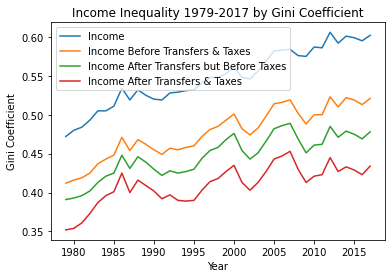

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

In [54]:
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Market_Income"], label="Income")
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Income_Before_Transfers_and_Taxes"], label="Income Before Transfers & Taxes")
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Income_After_Transfers_but_Before_Taxes"], label="Income After Transfers but Before Taxes")
plt.plot(Income_Inequality_1979_2017["Year"], Income_Inequality_1979_2017["Based_on_Income_After_Transfers_and_Taxes"], label="Income After Transfers & Taxes")
plt.xlabel("Year")
plt.ylabel("Gini Coefficient")
plt.title("Income Inequality 1979-2017 by Gini Coefficient")
plt.legend()
plt.show()
plt.figure(figsize=(20,20))

### 6. Wealth Inequality 

In [60]:
Federal_Reserve_Net_Wealth_Data = pd.read_csv ('CBO_distribution_household_income_2017_data\Federal_Reserve_Net_Wealth_Data.csv')
Federal_Reserve_Net_Wealth_Data.head()


,year,Income_Category,Before_Tax_Income,Net_Worth,Assets,Financial_Assets,Transaction_Accounts,Certificates_of_Deposit,Savings_Bonds,Directly_Held_Bonds,...,Other_Res_Real_Estate_Debt,Installment_Loans,Other_Lines_of_Credit,Credit_Card_Balances,Other_Debt,Mortgages_Home_Equity_Loans,Home_Equity_Lines_of_Credit,Vehicle_Installment_Loans,Education_Installment_Loans,Other_Installment_Loans
0,1989,Less than 20,12.455448,3.818790,15.513835,1.988953,0.994477,25.856391,0.397791,25.856391,...,7.955813,2.685087,1.988953,0.596686,0.994477,13.922672,0.019890,3.977906,5.330395,0.994477
1,1989,20-39.9,29.062712,49.326039,82.422220,8.751394,1.988953,19.889532,1.392267,49.723830,...,47.734876,5.966860,1.790058,1.193372,1.988953,23.867438,49.723830,5.966860,5.966860,1.988953
2,1989,40-59.9,51.897699,83.774708,134.214561,16.707207,3.977906,21.878485,1.193372,31.823251,...,27.845345,11.933719,0.994477,1.591163,1.790058,41.768017,15.911625,11.933719,7.955813,2.983430
3,1989,60-79.9,80.960411,134.254340,214.806944,30.112751,5.569069,19.889532,0.994477,39.779064,...,27.845345,13.922672,3.977906,1.988953,1.988953,71.602315,29.834298,12.411068,5.966860,3.977906
4,1989,80-89.9,118.326754,266.778290,384.663545,58.873014,9.546975,17.900579,0.994477,53.701736,...,53.701736,15.911625,3.977906,2.565750,7.955813,81.547080,49.723830,15.911625,3.977906,3.977906


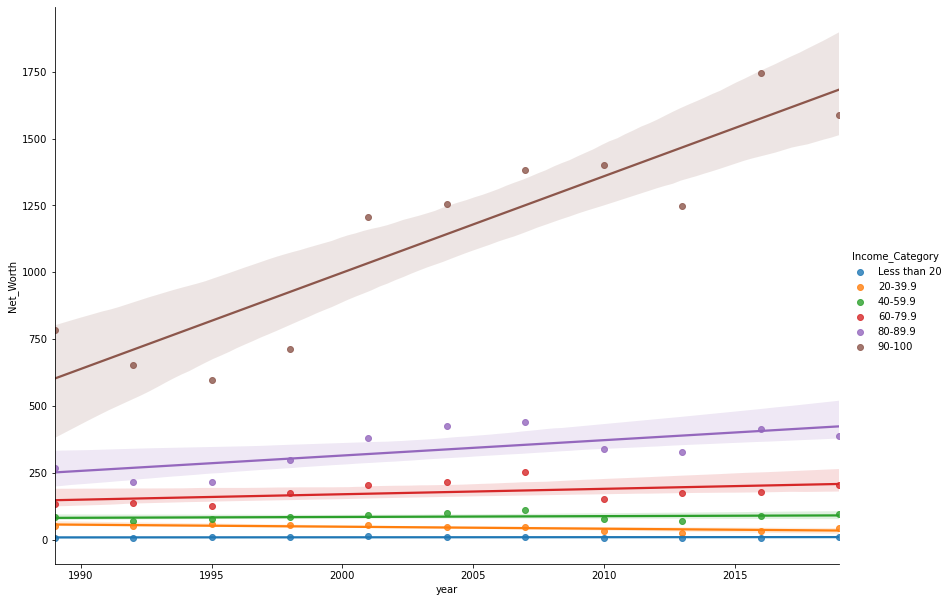

In [62]:
sns.lmplot(data=Federal_Reserve_Net_Wealth_Data, x="year", y="Net_Worth", hue="Income_Category", height=8.27, aspect=11.7/8.27)
#There is a large net worth increase in top 10%

### 7. Life Expectancy Outcomes. 

**There is a marked difference. 15 years for males and 10 years for females.**

In [70]:
National_Life_Expectancy_By_Sex_By_Income = pd.read_csv ('National_Life_Expectancy.csv')
National_Life_Expectancy_By_Sex_By_Income.head()


,Gender,Household_Income_Percentile,Year,Count,Mean_Household_Income,Race_Adjusted_Life_Expectancy,Unadjusted_Life_Expectancy,Standard_Error_of_Race-Adjusted_Life_Expectancy,Standard_Error_of_Unadjusted_Life_Expectancy
0,F,1,2001,"398,740",499.11,79.89,79.68,0.39,0.39
1,F,1,2002,"411,159",541.31,79.41,79.18,0.35,0.35
2,F,1,2003,"420,298",529.14,79.57,79.36,0.36,0.36
3,F,1,2004,"427,728",499.3,80.09,79.90,0.35,0.35
4,F,1,2005,"433,665",474.15,80.47,80.28,0.33,0.33


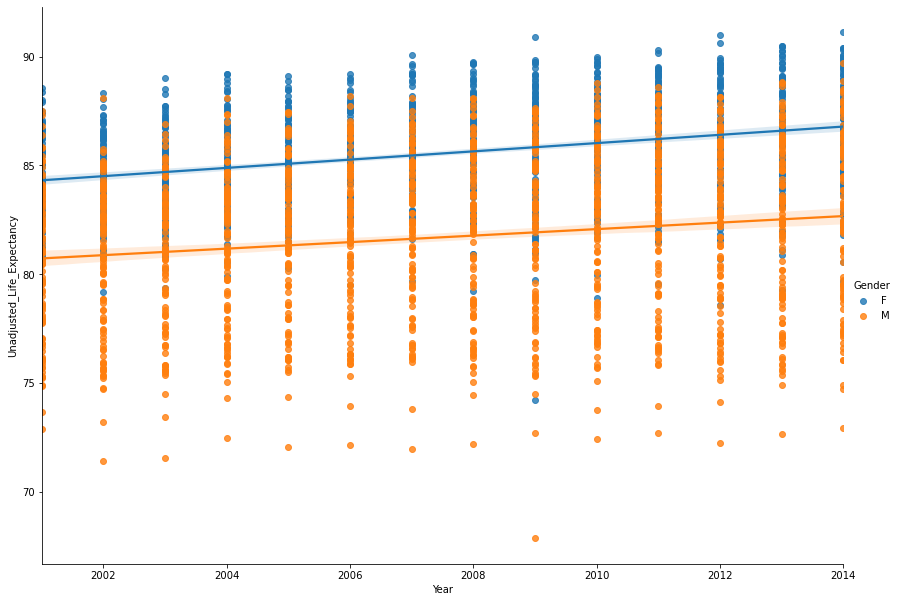

In [75]:
sns.lmplot(data=National_Life_Expectancy_By_Sex_By_Income, x="Year", y="Unadjusted_Life_Expectancy", hue="Gender", height=8.27, aspect=11.7/8.27)
#Will need to separate data points

###  9. Possible life expectancy and income model for prediction and inference. Data Table- Extending to 2030

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [ ]:
#Note could factor in COVID-19 reduced average American life expectancy by one year.

###  9. Possible life expectancy and income model for prediction and inference.  Graph- Extending to 2030

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [9]:
#Note could factor in COVID-19 reduced average American life expectancy by one year.